In [1]:
import os, random, natsort
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras

from PIL import Image
from glob import glob

In [2]:
os.getcwd()

'C:\\Users\\sdml\\0. PythonProject\\GAN_학부연구생\\hihi\\[TNT] CIFAR-10 Classification'

# def dataloder, image augumentation

In [3]:
def dataloader(path):
    path = path
    CIFAR_imageList = list()
    labels = list()
    for filename in glob(path+'/*'): # '*'는 임의 길이의 모든 문자열을 의미한다. ex) ./data/train\airplane
        for img in glob(filename +'/*.jpg'): # natsort.natsorted(os.listdir(path))와 같은 순서 및 결과

            temp_img = Image.open(img)
            temp_ary_img_original = np.array(temp_img)
            temp_ary_img_transpose = np.array(temp_img.transpose(Image.FLIP_LEFT_RIGHT))

            # 해당 이미지 리스트에 저장
            CIFAR_imageList.append(temp_ary_img_original)
            CIFAR_imageList.append(temp_ary_img_transpose)

            # 해당 이미지 폴더를 라벨로 사용
            label = filename.split('\\')[1]
            labels.append(label)
            labels.append(label)

    CIFAR_imageList = np.array(CIFAR_imageList)
    labels = np.array(labels)

    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    temp_labels = label_encoder.fit_transform(labels)
    labels_column = temp_labels.reshape(-1,1)
    labels_name = labels.reshape(-1,1)
    
    return CIFAR_imageList, labels_column, labels_name

In [4]:
trainset, Label_train, Label_name = dataloader('./data/train')
print(trainset.shape, Label_train.shape)
# 갯수, height, width, chaneel

(100000, 32, 32, 3) (100000, 1)


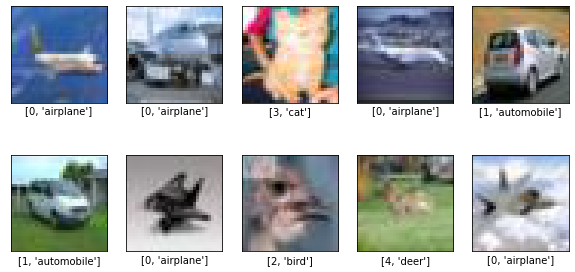

In [5]:
plt.figure(figsize=(10,5))
for i in range(10):
    num = random.randint(0,50000)
    plt.subplot(2,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel([Label_train[num][0], Label_name[num][0]])
    plt.imshow(trainset[num])
plt.show()

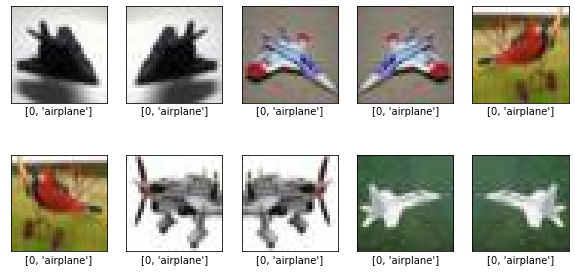

In [6]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel([Label_train[num][0], Label_name[num][0]])
    plt.imshow(trainset[i])
plt.show()

In [7]:
print(np.unique(Label_train))
print('\n', Label_train.ravel(), Label_train.ravel().shape )

[0 1 2 3 4 5 6 7 8 9]

 [0 0 0 ... 9 9 9] (100000,)


C:\Users\sdml\Anaconda3\envs\sdml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


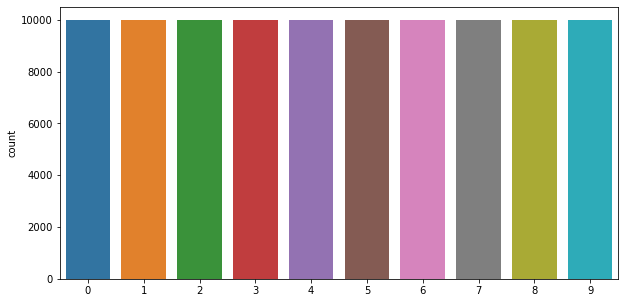

In [8]:
plt.figure(figsize = [10,5])
sns.countplot(Label_train.ravel()) # 다차원 배열을 1차원으로
plt.show()

# 데이터셋 준비

In [9]:
from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(trainset, Label_train, train_size = 0.8, random_state = 42)
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(trainset, Label_train, train_size = 0.9, random_state = 42, shuffle= True)
# X_train_clahe, X_valid_clahe, y_train_clahe, y_valid_clahe = train_test_split(clahe_trainset, clahe_Label_train, train_size = 0.8, random_state = 42)

In [10]:
print(X_train_.shape, X_valid_.shape, y_train_.shape, y_valid_.shape)
# print('\n', X_train_clahe.shape, X_valid_clahe.shape, y_train_clahe.shape, y_valid_clahe.shape)

(90000, 32, 32, 3) (10000, 32, 32, 3) (90000, 1) (10000, 1)


# (3,3,16) ->(3,3,32) -> (3,3,32) with maxpooling, dropout, input = (32,32,3)
# 26s

In [24]:
basic_model = tf.keras.models.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255),
    keras.layers.Conv2D(16,(3,3), activation = 'relu', padding = 'SAME', input_shape = (32,32,3)),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'SAME'),
    keras.layers.Dropout(0.23),
    keras.layers.Conv2D(32,(3,3), activation = 'relu', padding = 'SAME'),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'SAME'),
    keras.layers.Dropout(0.23),
    keras.layers.Conv2D(32,(3,3), activation = 'relu', padding = 'SAME'),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'SAME'),
    keras.layers.Dropout(0.23),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
    
])

In [26]:
basic_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [138]:
basic_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=200, batch_size=128)
# 중복학습된거임

Epoch 1/200
313/313 [==============================] - 26s 84ms/step - loss: 0.9947 - accuracy: 0.6474 - val_loss: 0.9500 - val_accuracy: 0.6665
Epoch 2/200
313/313 [==============================] - 26s 84ms/step - loss: 0.9808 - accuracy: 0.6493 - val_loss: 0.9167 - val_accuracy: 0.6798
Epoch 3/200
313/313 [==============================] - 26s 84ms/step - loss: 0.9617 - accuracy: 0.6563 - val_loss: 0.8787 - val_accuracy: 0.6965
Epoch 4/200
313/313 [==============================] - 26s 84ms/step - loss: 0.9347 - accuracy: 0.6690 - val_loss: 0.8999 - val_accuracy: 0.6837
Epoch 5/200
313/313 [==============================] - 27s 86ms/step - loss: 0.9233 - accuracy: 0.6700 - val_loss: 0.8631 - val_accuracy: 0.6976
Epoch 6/200
313/313 [==============================] - 27s 86ms/step - loss: 0.9047 - accuracy: 0.6820 - val_loss: 0.8897 - val_accuracy: 0.6875
Epoch 7/200
313/313 [==============================] - 27s 86ms/step - loss: 0.8883 - accuracy: 0.6838 - val_loss: 0.8766 - val_ac

313/313 [==============================] - 26s 84ms/step - loss: 0.5180 - accuracy: 0.8160 - val_loss: 0.7763 - val_accuracy: 0.7454
Epoch 114/200
313/313 [==============================] - 27s 85ms/step - loss: 0.5192 - accuracy: 0.8164 - val_loss: 0.7560 - val_accuracy: 0.7551
Epoch 115/200
313/313 [==============================] - 26s 84ms/step - loss: 0.5186 - accuracy: 0.8187 - val_loss: 0.7573 - val_accuracy: 0.7487
Epoch 116/200
313/313 [==============================] - 27s 85ms/step - loss: 0.5060 - accuracy: 0.8207 - val_loss: 0.7655 - val_accuracy: 0.7415
Epoch 117/200
313/313 [==============================] - 27s 85ms/step - loss: 0.5148 - accuracy: 0.8177 - val_loss: 0.7740 - val_accuracy: 0.7441
Epoch 118/200
313/313 [==============================] - 26s 83ms/step - loss: 0.5120 - accuracy: 0.8180 - val_loss: 0.7524 - val_accuracy: 0.7525
Epoch 119/200
313/313 [==============================] - 25s 81ms/step - loss: 0.5159 - accuracy: 0.8162 - val_loss: 0.7547 - val_ac

Epoch 169/200
313/313 [==============================] - 25s 81ms/step - loss: 0.4827 - accuracy: 0.8290 - val_loss: 0.7689 - val_accuracy: 0.7524
Epoch 170/200
313/313 [==============================] - 25s 81ms/step - loss: 0.4807 - accuracy: 0.8282 - val_loss: 0.7876 - val_accuracy: 0.7488
Epoch 171/200
313/313 [==============================] - 25s 81ms/step - loss: 0.4827 - accuracy: 0.8311 - val_loss: 0.7854 - val_accuracy: 0.7456
Epoch 172/200
313/313 [==============================] - 25s 81ms/step - loss: 0.4743 - accuracy: 0.8307 - val_loss: 0.7695 - val_accuracy: 0.7492
Epoch 173/200
313/313 [==============================] - 25s 81ms/step - loss: 0.4744 - accuracy: 0.8345 - val_loss: 0.7790 - val_accuracy: 0.7497
Epoch 174/200
313/313 [==============================] - 25s 81ms/step - loss: 0.4756 - accuracy: 0.8320 - val_loss: 0.8089 - val_accuracy: 0.7368
Epoch 175/200
313/313 [==============================] - 25s 81ms/step - loss: 0.4816 - accuracy: 0.8295 - val_loss: 0

In [27]:
basic_model.fit(X_train_, y_train_, validation_data=(X_valid_, y_valid_), epochs=200, batch_size=128)

Epoch 1/200
625/625 [==============================] - 54s 86ms/step - loss: 1.6241 - accuracy: 0.4064 - val_loss: 1.3507 - val_accuracy: 0.5197
Epoch 2/200
625/625 [==============================] - 57s 91ms/step - loss: 1.3276 - accuracy: 0.5237 - val_loss: 1.1742 - val_accuracy: 0.5796
Epoch 3/200
625/625 [==============================] - 50s 80ms/step - loss: 1.2121 - accuracy: 0.5683 - val_loss: 1.0685 - val_accuracy: 0.6198
Epoch 4/200
625/625 [==============================] - 57s 91ms/step - loss: 1.1406 - accuracy: 0.5926 - val_loss: 1.0109 - val_accuracy: 0.6439
Epoch 5/200
625/625 [==============================] - 54s 87ms/step - loss: 1.0924 - accuracy: 0.6122 - val_loss: 0.9687 - val_accuracy: 0.6614
Epoch 6/200
625/625 [==============================] - 55s 88ms/step - loss: 1.0507 - accuracy: 0.6288 - val_loss: 0.9081 - val_accuracy: 0.6819
Epoch 7/200
625/625 [==============================] - 53s 85ms/step - loss: 1.0163 - accuracy: 0.6405 - val_loss: 0.8731 - val_ac

625/625 [==============================] - 46s 74ms/step - loss: 0.6008 - accuracy: 0.7904 - val_loss: 0.6471 - val_accuracy: 0.7773
Epoch 114/200
625/625 [==============================] - 46s 73ms/step - loss: 0.6042 - accuracy: 0.7868 - val_loss: 0.6235 - val_accuracy: 0.7850
Epoch 115/200
625/625 [==============================] - 46s 74ms/step - loss: 0.5983 - accuracy: 0.7871 - val_loss: 0.6163 - val_accuracy: 0.7897
Epoch 116/200
625/625 [==============================] - 48s 76ms/step - loss: 0.6029 - accuracy: 0.7865 - val_loss: 0.6675 - val_accuracy: 0.7722
Epoch 117/200
625/625 [==============================] - 46s 74ms/step - loss: 0.6000 - accuracy: 0.7904 - val_loss: 0.6340 - val_accuracy: 0.7813
Epoch 118/200
625/625 [==============================] - 46s 74ms/step - loss: 0.5969 - accuracy: 0.7888 - val_loss: 0.6287 - val_accuracy: 0.7835
Epoch 119/200
625/625 [==============================] - 46s 74ms/step - loss: 0.5984 - accuracy: 0.7883 - val_loss: 0.6340 - val_ac

Epoch 169/200
625/625 [==============================] - 50s 80ms/step - loss: 0.5687 - accuracy: 0.7983 - val_loss: 0.6522 - val_accuracy: 0.7775
Epoch 170/200
625/625 [==============================] - 50s 80ms/step - loss: 0.5752 - accuracy: 0.7965 - val_loss: 0.6617 - val_accuracy: 0.7757
Epoch 171/200
625/625 [==============================] - 50s 81ms/step - loss: 0.5729 - accuracy: 0.7970 - val_loss: 0.6444 - val_accuracy: 0.7778
Epoch 172/200
625/625 [==============================] - 50s 80ms/step - loss: 0.5761 - accuracy: 0.7964 - val_loss: 0.6358 - val_accuracy: 0.7830
Epoch 173/200
625/625 [==============================] - 52s 83ms/step - loss: 0.5649 - accuracy: 0.8000 - val_loss: 0.6368 - val_accuracy: 0.7817
Epoch 174/200
625/625 [==============================] - 51s 82ms/step - loss: 0.5752 - accuracy: 0.7977 - val_loss: 0.6187 - val_accuracy: 0.7890
Epoch 175/200
625/625 [==============================] - 50s 81ms/step - loss: 0.5751 - accuracy: 0.7971 - val_loss: 0

In [12]:
basic_model_x = tf.keras.models.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255),
    keras.layers.Conv2D(64,(4,4), activation = 'relu', padding = 'SAME', input_shape = (32,32,3)),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'SAME'),
    keras.layers.Dropout(0.23),
    keras.layers.Conv2D(128,(3,3), activation = 'relu', padding = 'SAME'),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'SAME'),
    keras.layers.Dropout(0.23),
    keras.layers.Conv2D(256,(3,3), activation = 'relu', padding = 'SAME'),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'SAME'),
    keras.layers.Dropout(0.23),
    keras.layers.Conv2D(512,(3,3), activation = 'relu', padding = 'SAME'),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'SAME'),
    keras.layers.Dropout(0.23),
    keras.layers.GlobalAveragePooling2D(), # FLATTEN
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
    
])
EPOCH = 50
BATCH_SIZE = 128

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=5,         
                             )

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
)
basic_model_x.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
data = basic_model_x.fit(X_train_, 
                 y_train_, 
                 validation_data=(X_valid_, y_valid_), 
                 epochs=EPOCH, 
                 batch_size=BATCH_SIZE, 
                 callbacks=[reduceLR, earlystopping],)

Epoch 1/50
704/704 [==============================] - 16s 19ms/step - loss: 1.8300 - accuracy: 0.3008 - val_loss: 1.1601 - val_accuracy: 0.5858
Epoch 2/50
704/704 [==============================] - 12s 17ms/step - loss: 1.1175 - accuracy: 0.6034 - val_loss: 0.8914 - val_accuracy: 0.6903
Epoch 3/50
704/704 [==============================] - 12s 16ms/step - loss: 0.8987 - accuracy: 0.6850 - val_loss: 0.7313 - val_accuracy: 0.7439
Epoch 4/50
704/704 [==============================] - 12s 17ms/step - loss: 0.7834 - accuracy: 0.7257 - val_loss: 0.7472 - val_accuracy: 0.7425
Epoch 5/50
704/704 [==============================] - 12s 17ms/step - loss: 0.7223 - accuracy: 0.7456 - val_loss: 0.6450 - val_accuracy: 0.7735
Epoch 6/50
704/704 [==============================] - 12s 17ms/step - loss: 0.6683 - accuracy: 0.7647 - val_loss: 0.6032 - val_accuracy: 0.7919
Epoch 7/50
704/704 [==============================] - 12s 17ms/step - loss: 0.6214 - accuracy: 0.7790 - val_loss: 0.5784 - val_accuracy:

# (grayscale, CLAHE), optimizer, batchnormalization, rescaling, 1x1 convolution layer, resize ->(100,100,3), dense layer, leaky relu
# -> 크게 유의미한 결과 x, 모델이 복잡할수록 학습시간 증가 (ex 1400s)